In [1]:
# importing necessary libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Building cosine wave dataset

x = 0.1*np.arange(1000)
data = np.cos(x)

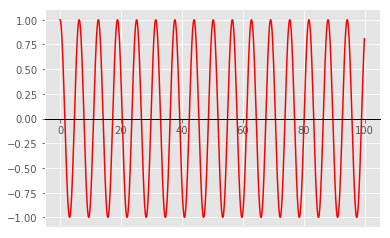

In [3]:
# Ploting cosine wave with generated dataset 

plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(0,100,auto=True)

plt.plot(x,data, 'r')

plt.show()

In [4]:
# Scaling down the raw data with StandardScaler()

scaler_01 = StandardScaler()
data_scaled = scaler_01.fit_transform(data.reshape(-1,1))
scaler_02 = StandardScaler()
x_scaled = scaler_02.fit_transform(x.reshape(-1,1))

In [5]:
data_scaled = data_scaled.flatten()
x_scaled = x_scaled.flatten()

In [6]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-150]
x_training_dataset = x_scaled[:-150]

In [7]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+10):]
x_test_dataset = x_scaled[-(150+10):]

In [8]:
# Preparing the training dataset for LSTM input1 

T = 20
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (830, 20, 1) Y.Shape: (830,)


In [9]:
# Preparing the training dataset for LSTM input2 

T = 20
XX = []

for t in range(len(x_training_dataset)-T):
  x = x_training_dataset[t:t+T]
  XX.append(x)
  y = x_training_dataset[t+T]
XX = np.array(XX).reshape(-1, T, 1)
print("XX.Shape:",XX.shape)

XX.Shape: (830, 20, 1)


In [10]:
# Splitting training dataset for input1 again into x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (664, 20, 1) x_test.shape: (166, 20, 1) y_train.shape: (664,) y_test.shape: (166,)


In [11]:
# Splitting training dataset for input2 again into xx_train, xx_test

xx_train, xx_test = train_test_split(XX, test_size=0.2, shuffle=False)
print("xx_train.shape:",xx_train.shape, "xx_test.shape:",xx_test.shape)

xx_train.shape: (664, 20, 1) xx_test.shape: (166, 20, 1)


In [12]:
# Building LSTM model

input1 = tf.keras.layers.Input(shape=(20,1))
x1 = tf.keras.layers.LSTM(30, activation='selu')(input1)

input2 = tf.keras.layers.Input(shape=(20,1))
x2 = tf.keras.layers.LSTM(30, activation='selu')(input2)


# equivalent to `added = tf.keras.layers.add([x1, x2])`

added = tf.keras.layers.Concatenate(axis=-1)([x1, x2])
out = tf.keras.layers.Dense(1, activation='selu')(added)
model = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

model.compile(loss='mean_absolute_error', optimizer=Adam(lr=.001), metrics=['accuracy'])

W0727 12:53:37.867235 22684 deprecation.py:506] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0727 12:53:37.964050 22684 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20, 1)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 20, 1)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30)           3840        input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 30)           3840        input_2[0][0]                    
______________________________________________________________________________________________

In [14]:
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=.001), metrics=['accuracy'])

In [15]:
r = model.fit([x_train.reshape(664, 20, 1), xx_train.reshape(664, 20, 1)], y_train, epochs=50, validation_data=([x_test.reshape(166, 20, 1),xx_test.reshape(166, 20, 1)], y_test))

Train on 664 samples, validate on 166 samples
Epoch 1/50
664/664 [==============================] - 2s 3ms/sample - loss: 0.6520 - acc: 0.0000e+00 - val_loss: 0.4303 - val_acc: 0.0000e+00
Epoch 2/50
664/664 [==============================] - 0s 511us/sample - loss: 0.2381 - acc: 0.0000e+00 - val_loss: 0.1112 - val_acc: 0.0000e+00
Epoch 3/50
664/664 [==============================] - 0s 534us/sample - loss: 0.0906 - acc: 0.0000e+00 - val_loss: 0.0675 - val_acc: 0.0000e+00
Epoch 4/50
664/664 [==============================] - 0s 504us/sample - loss: 0.0354 - acc: 0.0000e+00 - val_loss: 0.0318 - val_acc: 0.0000e+00
Epoch 5/50
664/664 [==============================] - 0s 511us/sample - loss: 0.0242 - acc: 0.0000e+00 - val_loss: 0.0189 - val_acc: 0.0000e+00
Epoch 6/50
664/664 [==============================] - 0s 522us/sample - loss: 0.0203 - acc: 0.0000e+00 - val_loss: 0.0164 - val_acc: 0.0000e+00
Epoch 7/50
664/664 [==============================] - 0s 514us/sample - loss: 0.0202 - acc: 

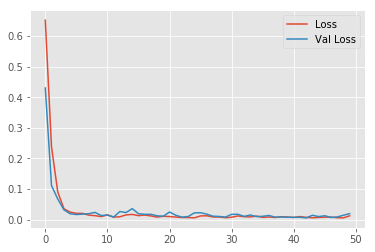

In [16]:
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [17]:
result = model.predict([x_test,xx_test])

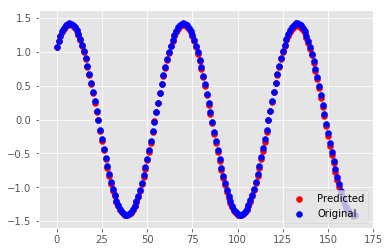

In [18]:
plt.style.use('ggplot')
plt.scatter(range(166), result, c='r', label="Predicted")
plt.scatter(range(166),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

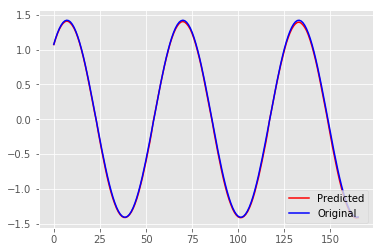

In [19]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [20]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+20):]
x_test_dataset = x_scaled[-(150+20):]

In [21]:
# Preparing the training dataset for LSTM input 

T = 20
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (150, 20, 1) Y_test.Shape: (150,)


In [22]:
# Preparing the training dataset for LSTM input 

T = 20
XX_test = []

for t in range(len(x_test_dataset)-T):
  x = x_test_dataset[t:t+T]
  XX_test.append(x)
  y = x_test_dataset[t+T]
XX_test = np.array(XX_test).reshape(-1, T, 1)
print("XX_test.Shape:",XX_test.shape)

XX_test.Shape: (150, 20, 1)


In [23]:
result_01 = model.predict([X_test,XX_test])

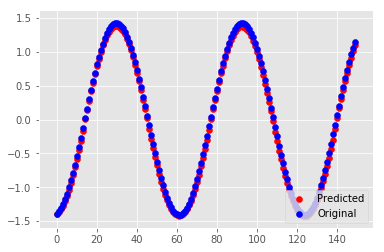

In [24]:
# Plotting Y_test and predicted Y_test 

plt.style.use('ggplot')
plt.scatter(range(150), result_01, c='r', label="Predicted")
plt.scatter(range(150),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

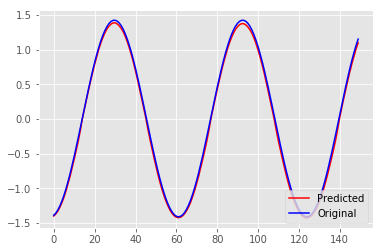

In [25]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result_01, c='r', label="Predicted")
plt.plot(Y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

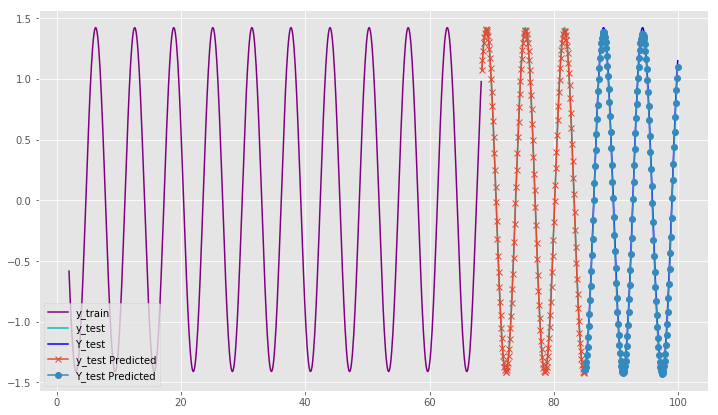

In [27]:
# Plotting y_train, y_test, Y_test, predicted y_test and predicted Y_test (with scaled values)


x = 0.1*np.arange(1000)
fig, ax1 = plt.subplots()


ax1.plot(x[20:-150][:664], y_train, c='purple', label='y_train')
ax1.plot(x[20:-150][664:], y_test, 'c-', label='y_test')
ax1.plot(x[850:], Y_test, 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], result, 'x-', label='y_test Predicted')
ax1.plot(x[850:], result_01, 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')

plt.rcParams['figure.figsize'] = 12,7
plt.show()

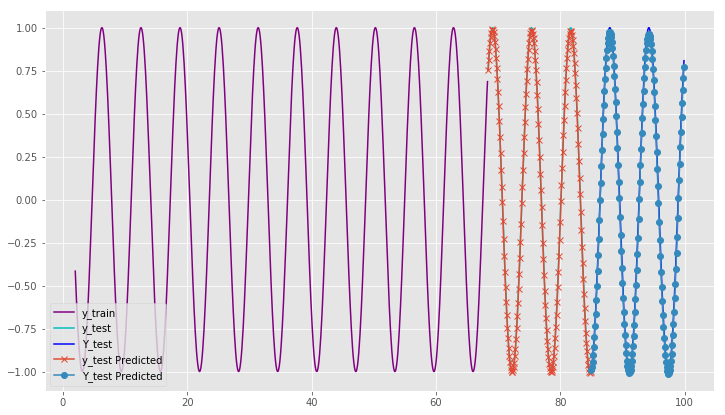

In [28]:
# Plotting y_train, predicted y_test and predicted Y_test (with original values)


fig, ax1 = plt.subplots()
ax1.plot(x[20:-150][:664], scaler_01.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
ax1.plot(x[20:-150][664:], scaler_01.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
ax1.plot(x[850:], scaler_01.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], scaler_01.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(x[850:], scaler_01.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

In [29]:
# Look into the future from 1000 to 1500 points
# last_xx values are not correctly feed  
future_predictions = []


last_x = x_test[-1] 
last_xx= xx_test[-1]

while len(future_predictions) < 500:
  p = model.predict([last_x.reshape(1, -1, 1), last_xx.reshape(1, -1, 1)])[0,0] 
  future_predictions.append(p) 
  last_x = np.roll(last_x, -1)
  last_xx = np.roll(last_x, -1)
  last_x[-1] = p
  last_xx[-1] = p

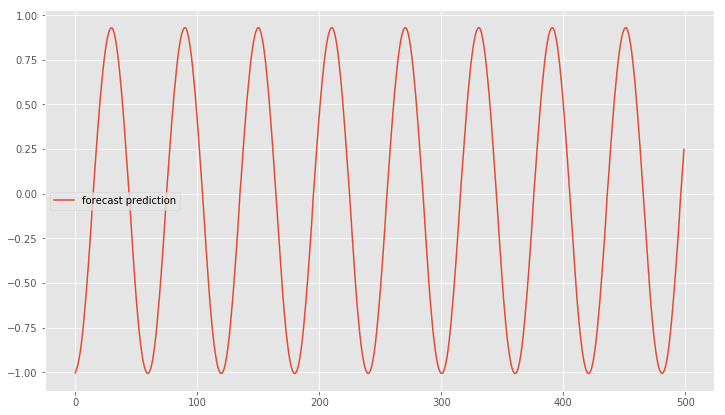

In [30]:
plt.plot(scaler_01.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='forecast prediction')
plt.legend()

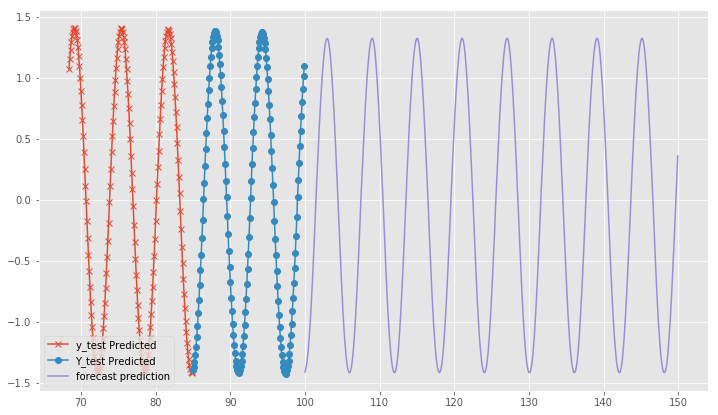

In [31]:
# Plotting predicted y_test, predicted Y_test and predicted future (with scaled values)

z= np.concatenate((x, 0.1*np.arange(1000,1500)), axis=None)
fig, ax1 = plt.subplots()

# ax1.plot(z[20:-150][0:664], y_train, c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], y_test, 'c-', label='y_test')
# ax1.plot(z[850:1000], Y_test, 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], result, 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], result_01, 'o-', label='Y_test Predicted')

plt.plot(z[1000:2000],future_predictions, label='forecast prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

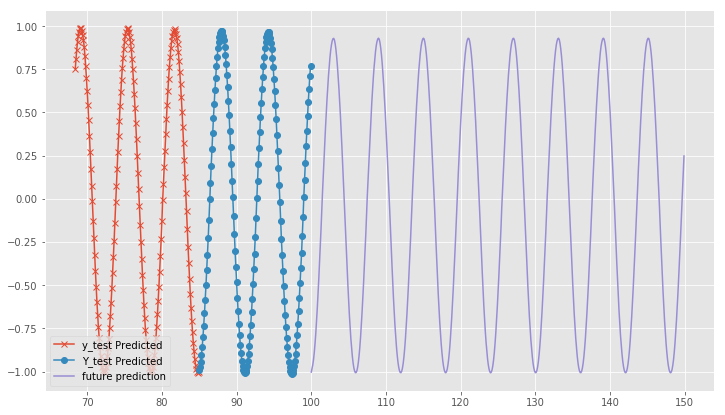

In [32]:
# Plotting predicted y_test, predicted Y_test and predicted future (with original values)

fig, ax1 = plt.subplots()

# ax1.plot(z[20:-150][0:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(z[850:1000], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], scaler_01.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], scaler_01.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')

plt.plot(z[1000:1500],scaler_01.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='future prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7